 Este tiempo en el que vivimos rodeado de conexiones a internet cambio nuestro estilo de vida, en especial la forma en la que compramos productos o ponemos nuestros negocios. En la actualidad tener presencia digital es fundamental lo que da lugar a la creacion de tiendas digitales o e-commerce. 
 
 Este trabajo surge dada la variedad de plataformas donde podemos crear nuestros e-commerce. Se espera una tendencia al alza de los mismos en el futuro y las  mejores plataformas digitales se quedaran con la mayor porcion de la demanda, se pueden obtener elevados retornos de inversion en este nuevo sector. 

 En este  analisis se observaran los precios de las acciones de Amazon,Mercado Libre,Wix,Shopify,Squarespace y BigCommerce Holding.Extraemos los datos desde Yahoo Finance  buscando cual obtuvo el mejor rendimiento en los ultimos 10 años, la correlacion del precio estre ellas  y su tendencia. 

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


tk_amzn=yf.Ticker("amzn")
amzn=tk_amzn.history("10y")
amzn["Symbol"]="amzn"
amzn["Volatilidad"]=((amzn["High"]-amzn["Low"])/amzn["Open"])*100
amzn["LNCLOSE"]=np.log(amzn["Close"])
amzn["MARKETCAP"]= amzn["Open"] * amzn["Volume"]
amzn["Variacion%"]=amzn["Close"].pct_change()


tk_meli=yf.Ticker("meli")
meli=tk_meli.history("10y")
meli["Symbol"]="meli"
meli["Variacion"]=((meli["High"]-meli["Low"])/meli["Open"])*100
meli["LNCLOSE"]=np.log(meli["Close"])
meli["MARKETCAP"]= meli["Open"] * meli["Volume"]


tk_shop=yf.Ticker("SHOP")
shop=tk_shop.history("10y")
shop["Symbol"]="shop"
shop["Variacion"]=((shop["High"]-shop["Low"])/shop["Open"])*100
shop["LNCLOSE"]=np.log(shop["Close"])
shop["MARKETCAP"]= shop["Open"] * shop["Volume"]




tk_wix=yf.Ticker("wix")
wix=tk_wix.history("10y")
wix["Symbol"]="wix"
wix["Variacion"]=((wix["High"]-wix["Low"])/wix["Open"])*100
wix["LNCLOSE"]=np.log(wix["Close"])
wix["MARKETCAP"]= wix["Open"] * wix["Volume"]



tk_sqsp=yf.Ticker("sqsp")
sqsp=tk_sqsp.history("10y")
sqsp["Symbol"]="sqsp"
sqsp["Variacion"]=((sqsp["High"]-sqsp["Low"])/sqsp["Open"])*100
sqsp["LNCLOSE"]=np.log(sqsp["Close"])
sqsp["MARKETCAP"]= sqsp["Open"] * sqsp["Volume"]




tk_bigc=yf.Ticker("bigc")
bigc=tk_bigc.history("10y")
bigc["Symbol"]="bigc"
bigc["Variacion"]=((bigc["High"]-bigc["Low"])/bigc["Open"])*100
bigc["LNCLOSE"]=np.log(bigc["Close"])
bigc["MARKETCAP"]= bigc["Open"] * bigc["Volume"]






Text(0.5, 1.0, 'Volatilidad vs Fecha')

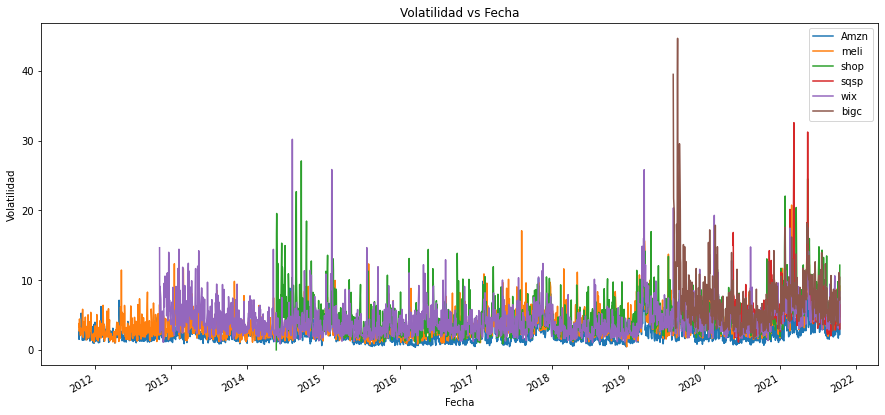

In [ ]:
#Graficamos la volatilidad de las acciones  
amzn["Variacion"].plot(label="Amzn" , figsize=(15,7))
meli["Variacion"].plot(label="meli"  )
shop["Variacion"].plot(label="shop" )
sqsp["Variacion"].plot(label="sqsp" )
wix["Variacion"].plot(label="wix" )
bigc["Variacion"].plot(label="bigc" )
plt.legend()
plt.ylabel("Volatilidad")
plt.xlabel("Fecha")
plt.title("Volatilidad vs Fecha")






Vemos que la accion mas volatil en el periodo 2013-2019 fue Wix  seguida por Shop. 

En 2020 Bigc tuvo su pico de volatilidad, causada por su OPV.

 En 2021 la accion mas volatil paso a ser Sqsp.

Text(0.5, 1.0, 'Precio en logaritmo vs Fecha')

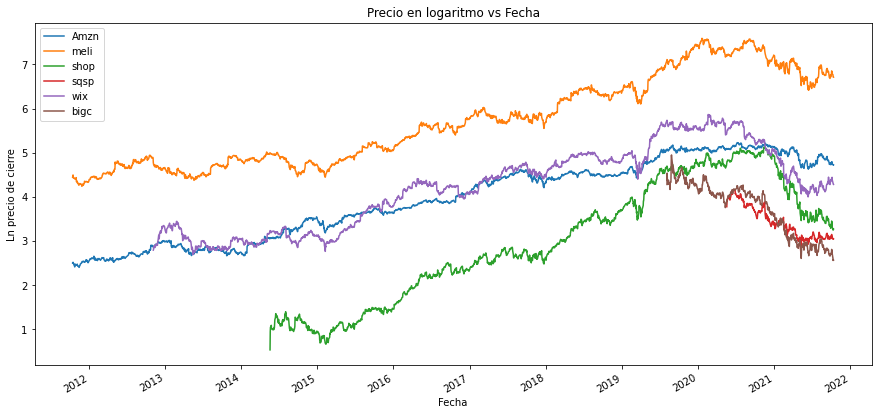

In [ ]:
#Grafiquemos los logaritmos de precio
amzn["LNCLOSE"].plot(label="Amzn" , figsize=(15,7))
meli["LNCLOSE"].plot(label="meli"  )
shop["LNCLOSE"].plot(label="shop" )
sqsp["LNCLOSE"].plot(label="sqsp" )
wix["LNCLOSE"].plot(label="wix" )
bigc["LNCLOSE"].plot(label="bigc" )
plt.legend()
plt.ylabel("Ln precio de cierre")
plt.xlabel("Fecha")
plt.title("Precio en logaritmo vs Fecha")

Vemos como todas las plataformas,a excepcion de Sqsp  y Bigc,presentan una tendencia alcista en los precios en el periodo de analisis. El contexto economico actual de subida de tipos de intereses no favorecio a las plataformas digitales, notamos importantes caidas en las plataformas Wix y Shop.


Text(0.5, 1.0, 'Marketcap vs Fecha')

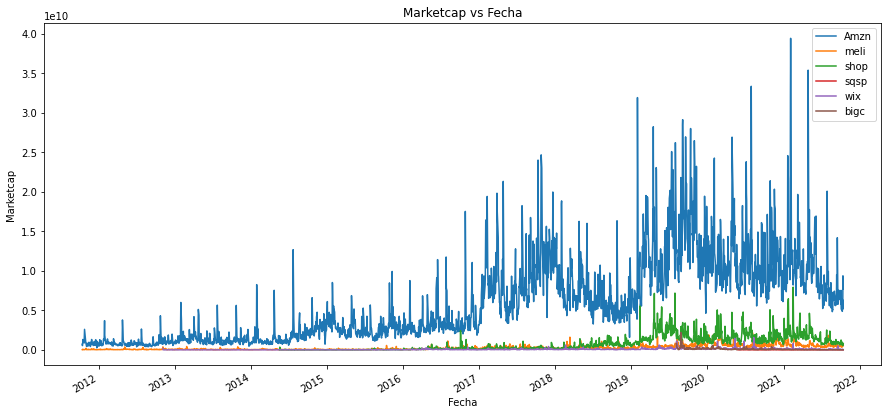

In [ ]:
#Market cap

amzn["MARKETCAP"].plot(label="Amzn" , figsize=(15,7))
meli["MARKETCAP"].plot(label="meli"  )
shop["MARKETCAP"].plot(label="shop" )
sqsp["MARKETCAP"].plot(label="sqsp" )
wix["MARKETCAP"].plot(label="wix" )
bigc["MARKETCAP"].plot(label="bigc" )
plt.legend()
plt.ylabel("Marketcap ")
plt.xlabel("Fecha")
plt.title("Marketcap vs Fecha")

Amazon presenta la mayor capitalizacion de mercado en el periodo de analisis, seguida por shop. 

Esperabamos que Amazon y Mercado libre se disputaran este segmetno pero vemos como Amazon se hace con el podio. Concluimos que se debe a que es una empresa Europea, cuenta con mas confianza. Mercado Libre es una buena empresa, pero al estar fundada en Argentina los inversiores pueden ser excepticos al exito en el futuro, dadas las condiciones  volatiles del contexto economico Argentino. 

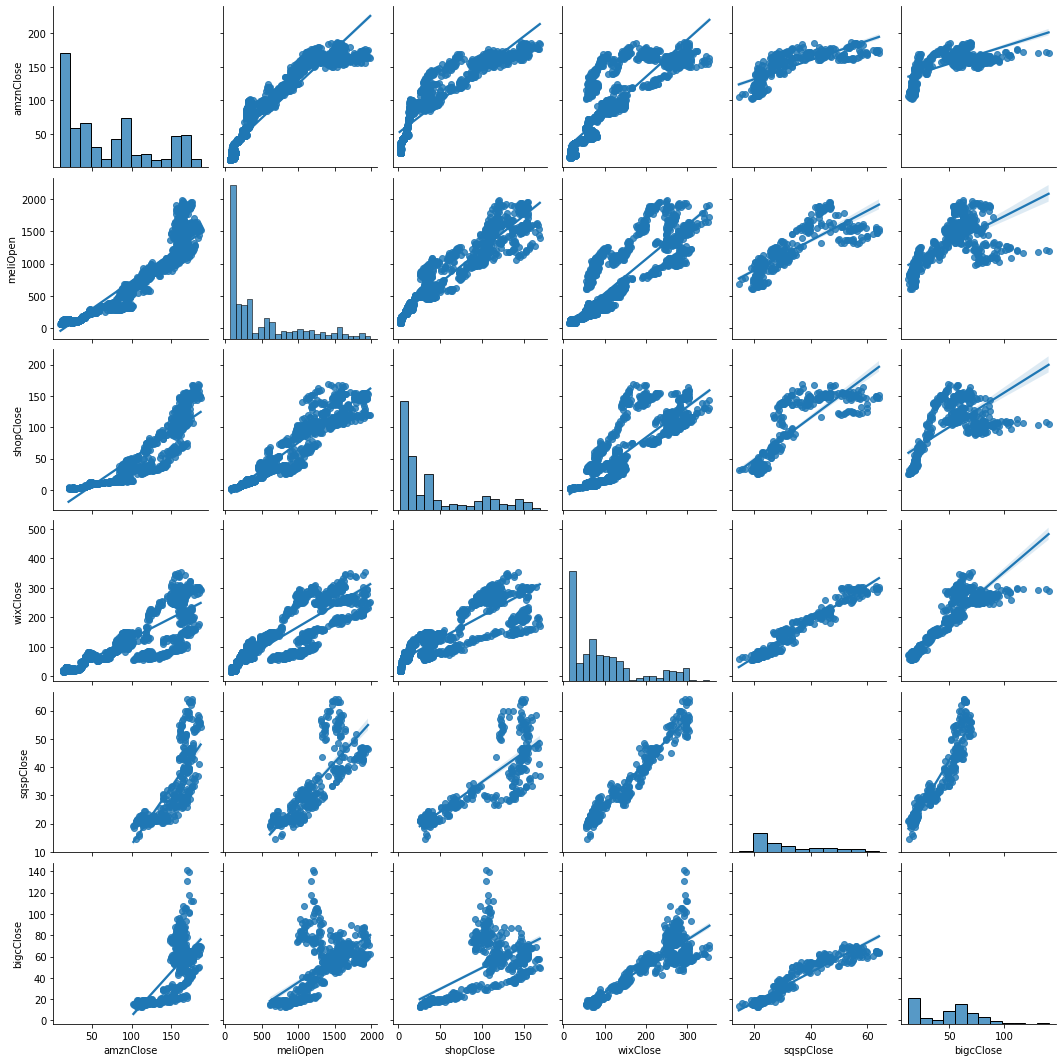

In [ ]:
data = pd.concat([amzn['Close'],meli['Close'],shop['Close'],wix['Close'],sqsp['Close'],bigc['Close']],axis = 1)
data.columns = ['amznClose','meliOpen','shopClose',"wixClose","sqspClose","bigcClose"]
sns.pairplot(data,kind="reg")
#scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

Todas los precios de cierre presentan una correlacion positiva con el resto de acciones. Destacando entre las mas fuertes a Sqsp con Bigc y Wix. 


In [ ]:
lista=[amzn,meli,shop,sqsp,wix,bigc]
nombres=["Amazon","Mercado Libre","Shop","Sqsp","Wic","Bigc"]


for i in lista:
  log_return=np.log(1+ i["Close"].pct_change())
  print("El rendimiento medio anual de",i["Symbol"][0],"es de",round((log_return.mean()*252)*100),"porciento")




El rendimiento medio anual de amzn es de 22 porciento
El rendimiento medio anual de meli es de 22 porciento
El rendimiento medio anual de shop es de 37 porciento
El rendimiento medio anual de sqsp es de -52 porciento
El rendimiento medio anual de wix es de 16 porciento
El rendimiento medio anual de bigc es de -80 porciento


Concluimos que el mejor rendimiento compuesto  a lo largo del periodo lo obtenemos invirtiendo en Shopify(37% anual), seguido por Amazon y Mercado libre(ambas con un retorno del 22% anual). 

No recomendamos invertir en Squarespace o en BigCommerce Holdings dados sus retornos negativos bajo el periodo de analisis. Son empresas nuevas que entran a un mercado ya consolidado y liderado por titanes como Amazon y Mercado libre. 